In [70]:
import os

import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

import platform
import matplotlib.pyplot as plt

_os = platform.system()

# Windows
if _os == 'Windows':
    plt.rc('font', family= 'Malgun Gothic')

# Mac
elif _os == 'Darwin':
    plt.rc('font', family= 'AppleGothic')

# Linux
elif _os == 'Linux':
    plt.rc('font', family= 'NanumGothic')

else:
    print(f'{_os} is not set')


from scipy.io import loadmat

In [71]:
mat = loadmat(os.path.join('data_mat', 'speech.mat'))
print(f"Loaded: {os.path.join('data_mat', 'speech.mat')}")
X = mat['X']
y = mat['y'].ravel()

unique, counts = np.unique(y, return_counts=True)
    
print(f'Data info:')
print(f'\t{dict(zip(unique, counts))}')
print(f'\toutlier percentage: {round(counts[1]/(counts[0]+counts[1])*100, 4)}%')
print(f'\trows: {X.shape[0]}, features: {X.shape[1]}')

df = pd.concat([pd.DataFrame(X), pd.DataFrame({'y':y})], axis=1)
df

Loaded: data_mat/speech.mat
Data info:
	{0: 3625, 1: 61}
	outlier percentage: 1.6549%
	rows: 3686, features: 400


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
0,-0.35069,0.52721,-1.62470,-1.334000,-1.03020,1.247500,-0.98067,-1.558700,-0.061233,1.048200,...,0.570960,-1.19840,2.168600,-0.30353,1.21620,-0.607070,0.503820,-0.45571,0.86283,1
1,-0.42537,-0.08818,0.84575,0.881570,1.35690,0.748940,-1.68620,0.461510,0.585700,0.775950,...,-0.582980,-0.35666,-0.638000,0.64106,-0.94488,-1.069700,-0.024029,0.28696,-0.12374,1
2,-1.22100,0.43960,-0.06303,0.709530,0.95079,-0.218740,-1.24850,-1.628600,-1.339700,-1.858500,...,-0.042742,2.77110,1.549400,-1.75680,-0.91595,-0.078469,0.097137,-0.55111,0.69951,1
3,-0.30132,0.55221,0.13769,0.715290,0.99311,-0.169590,-0.93405,-0.948250,-0.750880,0.003107,...,-0.103520,2.53710,2.096000,-1.43680,-1.05230,-0.070276,-0.539810,-1.10380,0.70562,1
4,0.31292,0.42762,0.50348,0.005489,-0.94274,-0.176190,-0.50775,-0.464450,0.694750,0.376040,...,1.060700,1.39660,0.096776,-1.18360,-0.37802,0.357150,1.278600,-0.40139,0.11640,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,-0.73029,0.41857,-0.41746,-0.454210,0.71168,-0.052522,-1.86610,0.220370,0.488910,-2.072700,...,-0.586100,1.47180,0.263640,-0.68870,-1.10260,0.467970,0.481060,-0.29457,0.55751,0
3682,-0.29375,1.46840,-0.28178,-1.411000,-0.91399,1.427700,0.68553,-0.549750,0.025032,0.857950,...,0.575650,0.58935,2.316300,1.00600,-0.15520,-0.343240,-0.023543,-1.57520,-0.37716,0
3683,0.94843,0.35538,-1.04010,0.292630,0.17207,-0.549300,-2.22700,0.111300,0.403860,0.000354,...,0.544540,2.01170,0.584910,-0.43648,-0.11118,0.197870,0.189580,1.04610,-0.30757,0
3684,1.49800,-0.66785,1.04800,-1.569300,-0.65241,1.957500,0.45265,0.807050,0.601570,0.813750,...,-0.453780,-0.29842,-0.641800,0.49518,-2.56460,-0.708690,0.369670,-0.49249,-0.40257,0


## EDA

In [72]:
df.isnull().sum().max()

0

In [73]:
df.shape

(3686, 401)

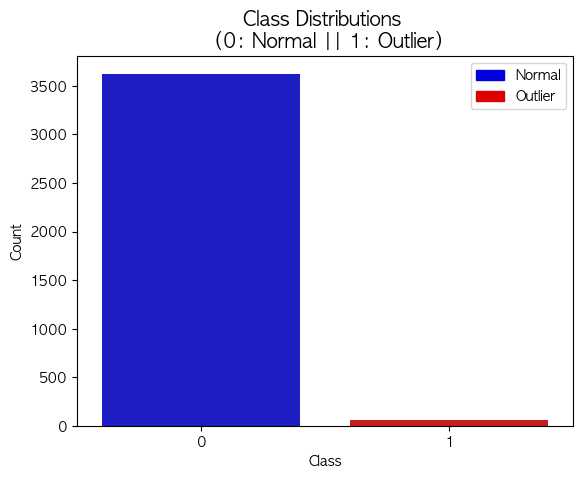

In [74]:
colors = ["#0101DF", "#DF0101"]

# Your existing plot code
sns.countplot(x='y', data=df, palette=colors)
plt.title('Class Distributions \n (0: Normal || 1: Outlier)', fontsize=14)

# Adding labels
plt.xlabel('Class')
plt.ylabel('Count')

# Creating a legend
normal_patch = mpatches.Patch(color='#0101DF', label='Normal')
outlier_patch = mpatches.Patch(color='#DF0101', label='Outlier')
plt.legend(handles=[normal_patch, outlier_patch])

## PreProcessing

### Scaling

### Sub-Sampling

![](https://i.imgur.com/rQSkoUC.png)


Outlier과 Normal의 비율을 50:50으로 맞추는 기법

Over-sampling: Outlier를 증강시켜 Normal의 개수에 맞추는 방법
Under-sampling: Outlier의 개수만큼 Normal을 추출해 개수를 맞추는 방법

In [75]:
df.columns[:-1]

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       390, 391, 392, 393, 394, 395, 396, 397, 398, 399],
      dtype='object', length=400)

In [76]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# 이상치에 덜 민감한 RobustScaler 사용

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

for feature_column in df.columns[:-1]:
    df[feature_column] = rob_scaler.fit_transform(df[feature_column].values.reshape(-1, 1))


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Normal', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Outliers', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('y', axis=1)
y = df['y']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# 분포 확인

# array로 변환
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Normal 98.35 % of the dataset
Outliers 1.65 % of the dataset


In [142]:

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]



# 분포 확인

# array로 변환
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

In [143]:


# 분포 확인

# array로 변환
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.9833842 0.0166158]
[0.98371777 0.01628223]


## Random Under-Sampling:


- 데이터를 제거하여 더욱 균형 잡힌 데이터셋을 만드는 "Random Under Sampling" 기법을 구현
- 과적합을 방지

### 과정
1. 클래스의 불균형 정도를 확인
2. Outlier 데이터("1"로 표시)의 수를 결정한 후
3. Outlier 데이터와 동일한 수의 정상를 선택하여 50/50 비율의 샘플 생성

- 데이터를 섞어 모델이 일관된 정확도를 유지할 수 있는지 확인

> 주의할 점: "Random Under-Sampling"을 사용하면 **많은 정보 손실(Information loss)이 발생할 수 있어** 분류 모델의 성능이 예상만큼 높지 않을 수 있다

In [78]:
df['y'].value_counts()[1]

61

In [79]:
df.sample(frac=1).shape

(3686, 401)

In [80]:
# subsample 만들기 전 shuffle

df = df.sample(frac=1)

outlier = df.loc[df['y'] == 1]
normal = df.loc[df['y'] == 0][:61] # outlier 수

normal_distributed_df = pd.concat([outlier, normal])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
28,0.085934,-0.926627,0.706328,-0.627915,-0.169481,-0.425683,0.278350,-0.351932,-0.113955,-1.383663,...,0.391670,0.220743,-0.640203,0.335836,-0.049371,-0.052474,0.402115,-0.088127,-0.388239,1
58,0.254569,1.247876,-0.317254,0.621599,0.930166,-0.898500,0.602317,-0.565947,-0.204441,-2.009849,...,-0.943189,-1.031019,0.529519,0.788127,0.639486,1.614466,0.144538,-0.881072,0.489699,1
24,-0.671753,1.063764,-0.544215,-0.163363,1.293971,0.041111,0.576741,-0.960866,0.307026,0.107021,...,-0.341978,0.520946,0.212913,-0.141467,-1.442255,-0.956684,-1.138486,-1.050990,-0.415632,1
1751,-0.013867,0.056701,0.320414,0.650240,0.362478,-0.253134,0.446055,-0.149921,-0.145736,-0.347558,...,-0.117154,-0.610896,-1.230722,-0.849832,-0.535670,0.192520,1.528733,0.329897,0.155173,0
4,0.405959,0.266293,0.218597,-0.179550,-0.698483,-0.068380,-0.325629,-0.401135,0.371370,0.338774,...,0.991430,0.890937,-0.405083,-0.886198,0.056780,-0.080194,0.583110,-0.271942,-0.024792,1


Distribution of the Classes in the subsample dataset
y
1    0.5
0    0.5
Name: count, dtype: float64


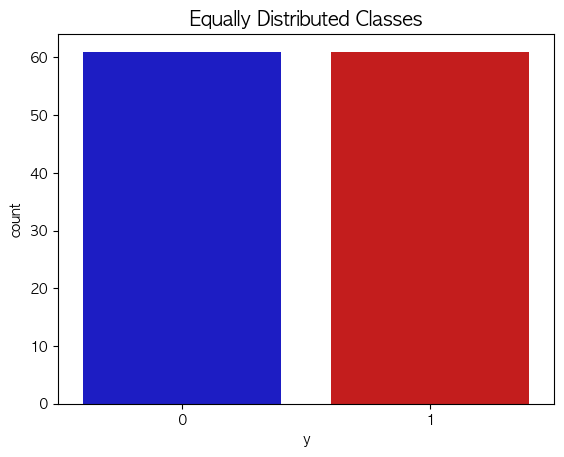

In [81]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['y'].value_counts()/len(new_df))



sns.countplot(x='y', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

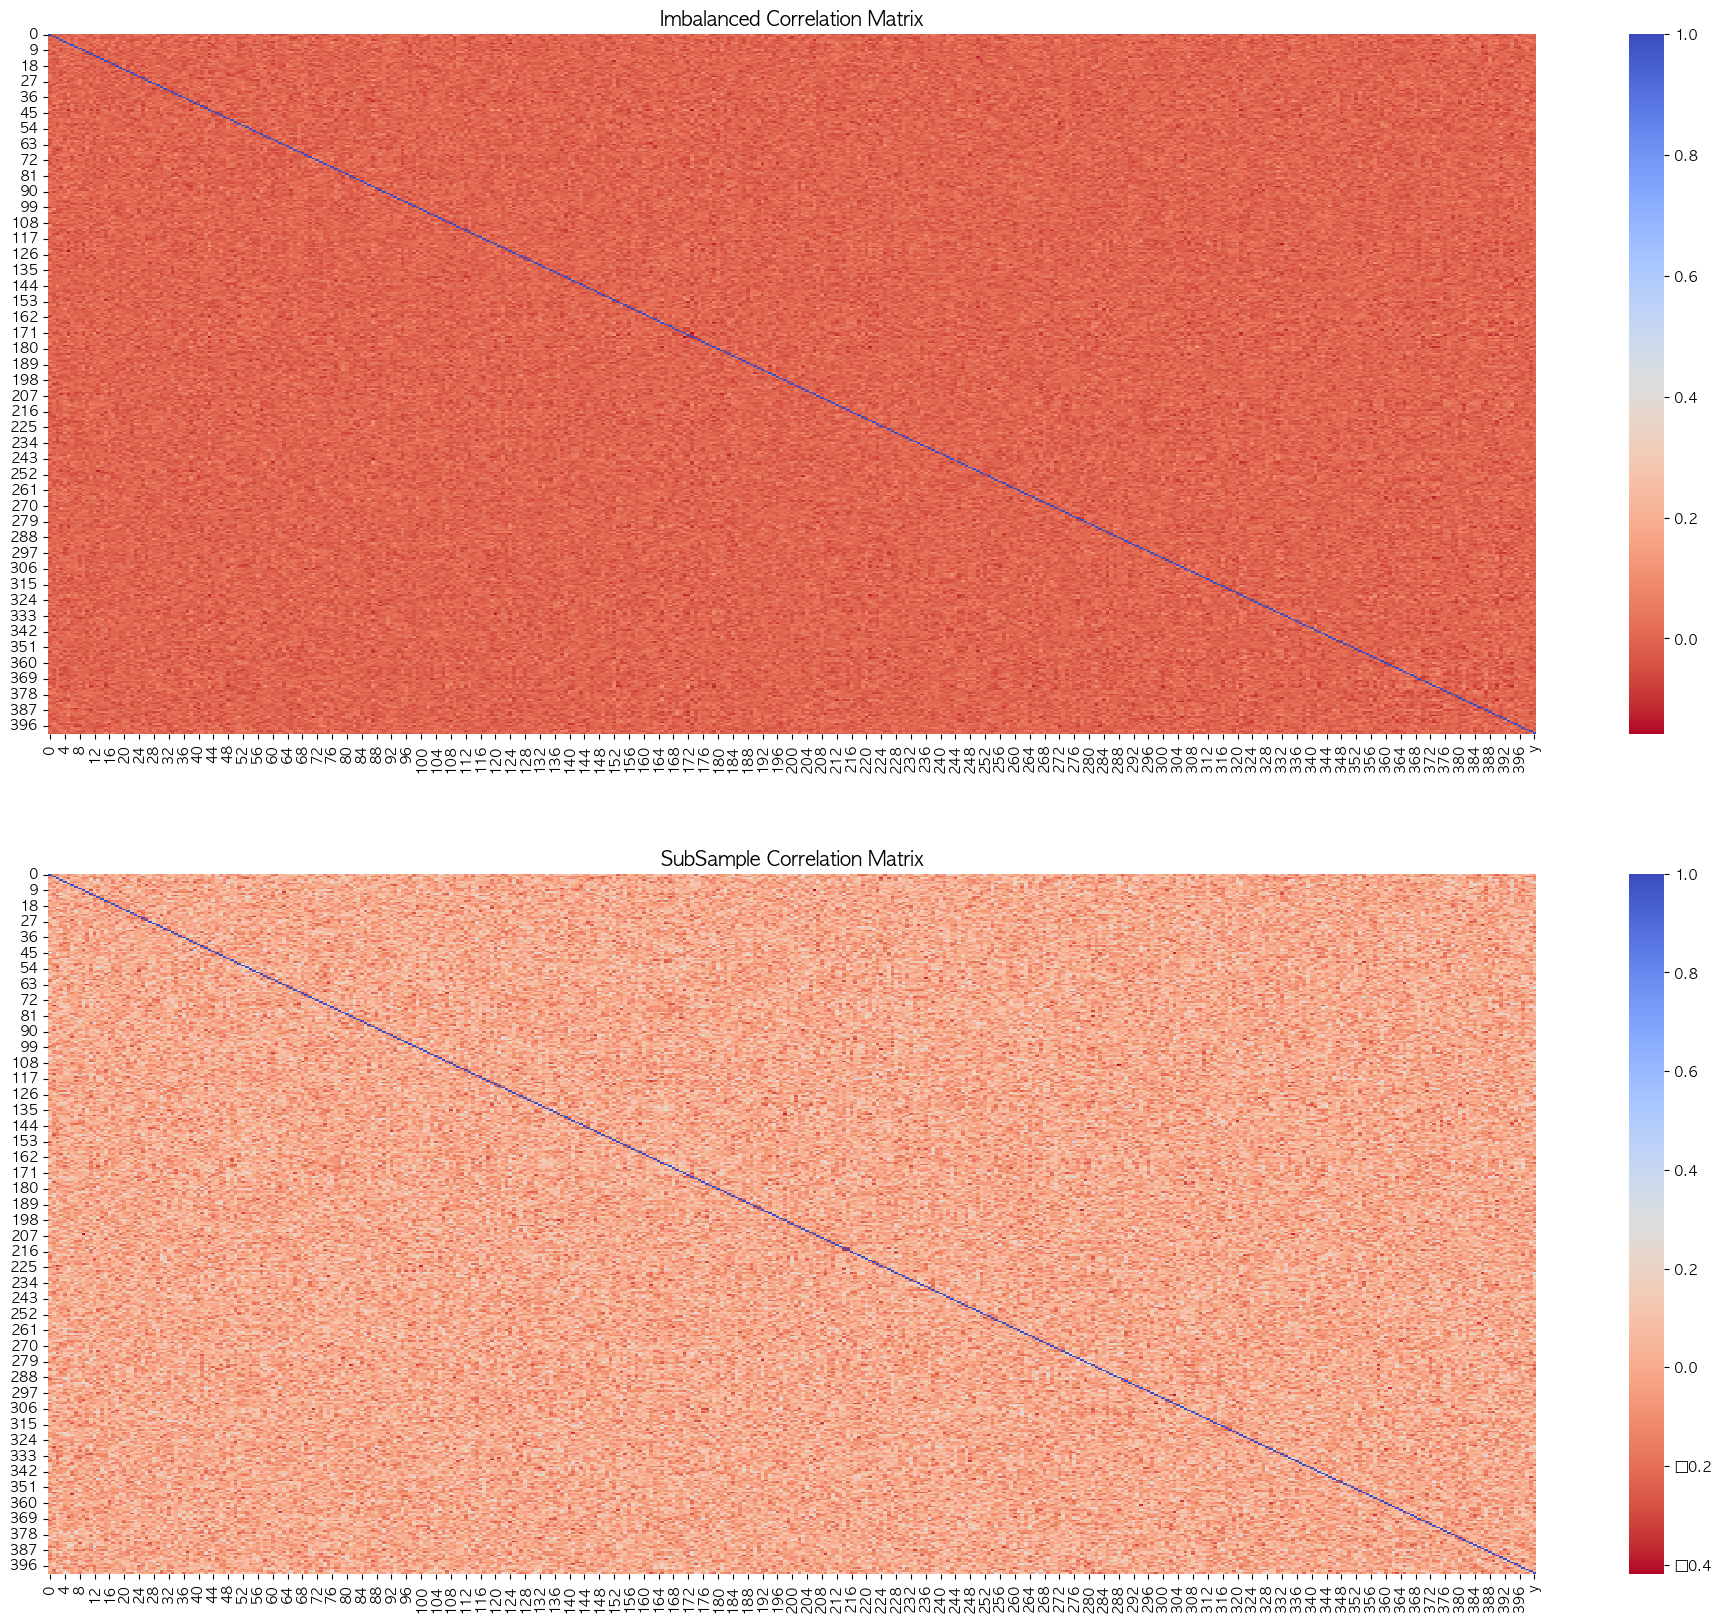

In [82]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

## 이상치 탐지(Anomlay Detection)

### 사분위수 범위 방법(Interquartile Range Method)
- 사분위수 범위(IQR): 75번째 백분위수와 25번째 백분위수의 차이로 계산. 이 임계값을 넘는 경우 인스턴스를 삭제하는 것이 목표
- 박스플롯: 25번째 및 75번째 백분위수를 쉽게 볼 수 있으며 극단적인 이상치도 쉽게 확인할 수 있다

### 이상치 제거의 타협(Outlier Removal Tradeoff):
- 임계값을 얼마나 설정할지 주의 깊게 결정해야 한다
    - 이 임계값이 높을수록 적은 이상치를 감지하고, 낮을수록 더 많은 이상치를 감지하기 때문이다

타협점: 임계값이 낮을수록 더 많은 이상치를 제거하지만, 정보 손실의 위험을 줄이기 위해 "극단적인 이상치"에 더 초점을 맞추고자 한다. 

참고: [How to Use Statistics to Identify Outliers in Data](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)

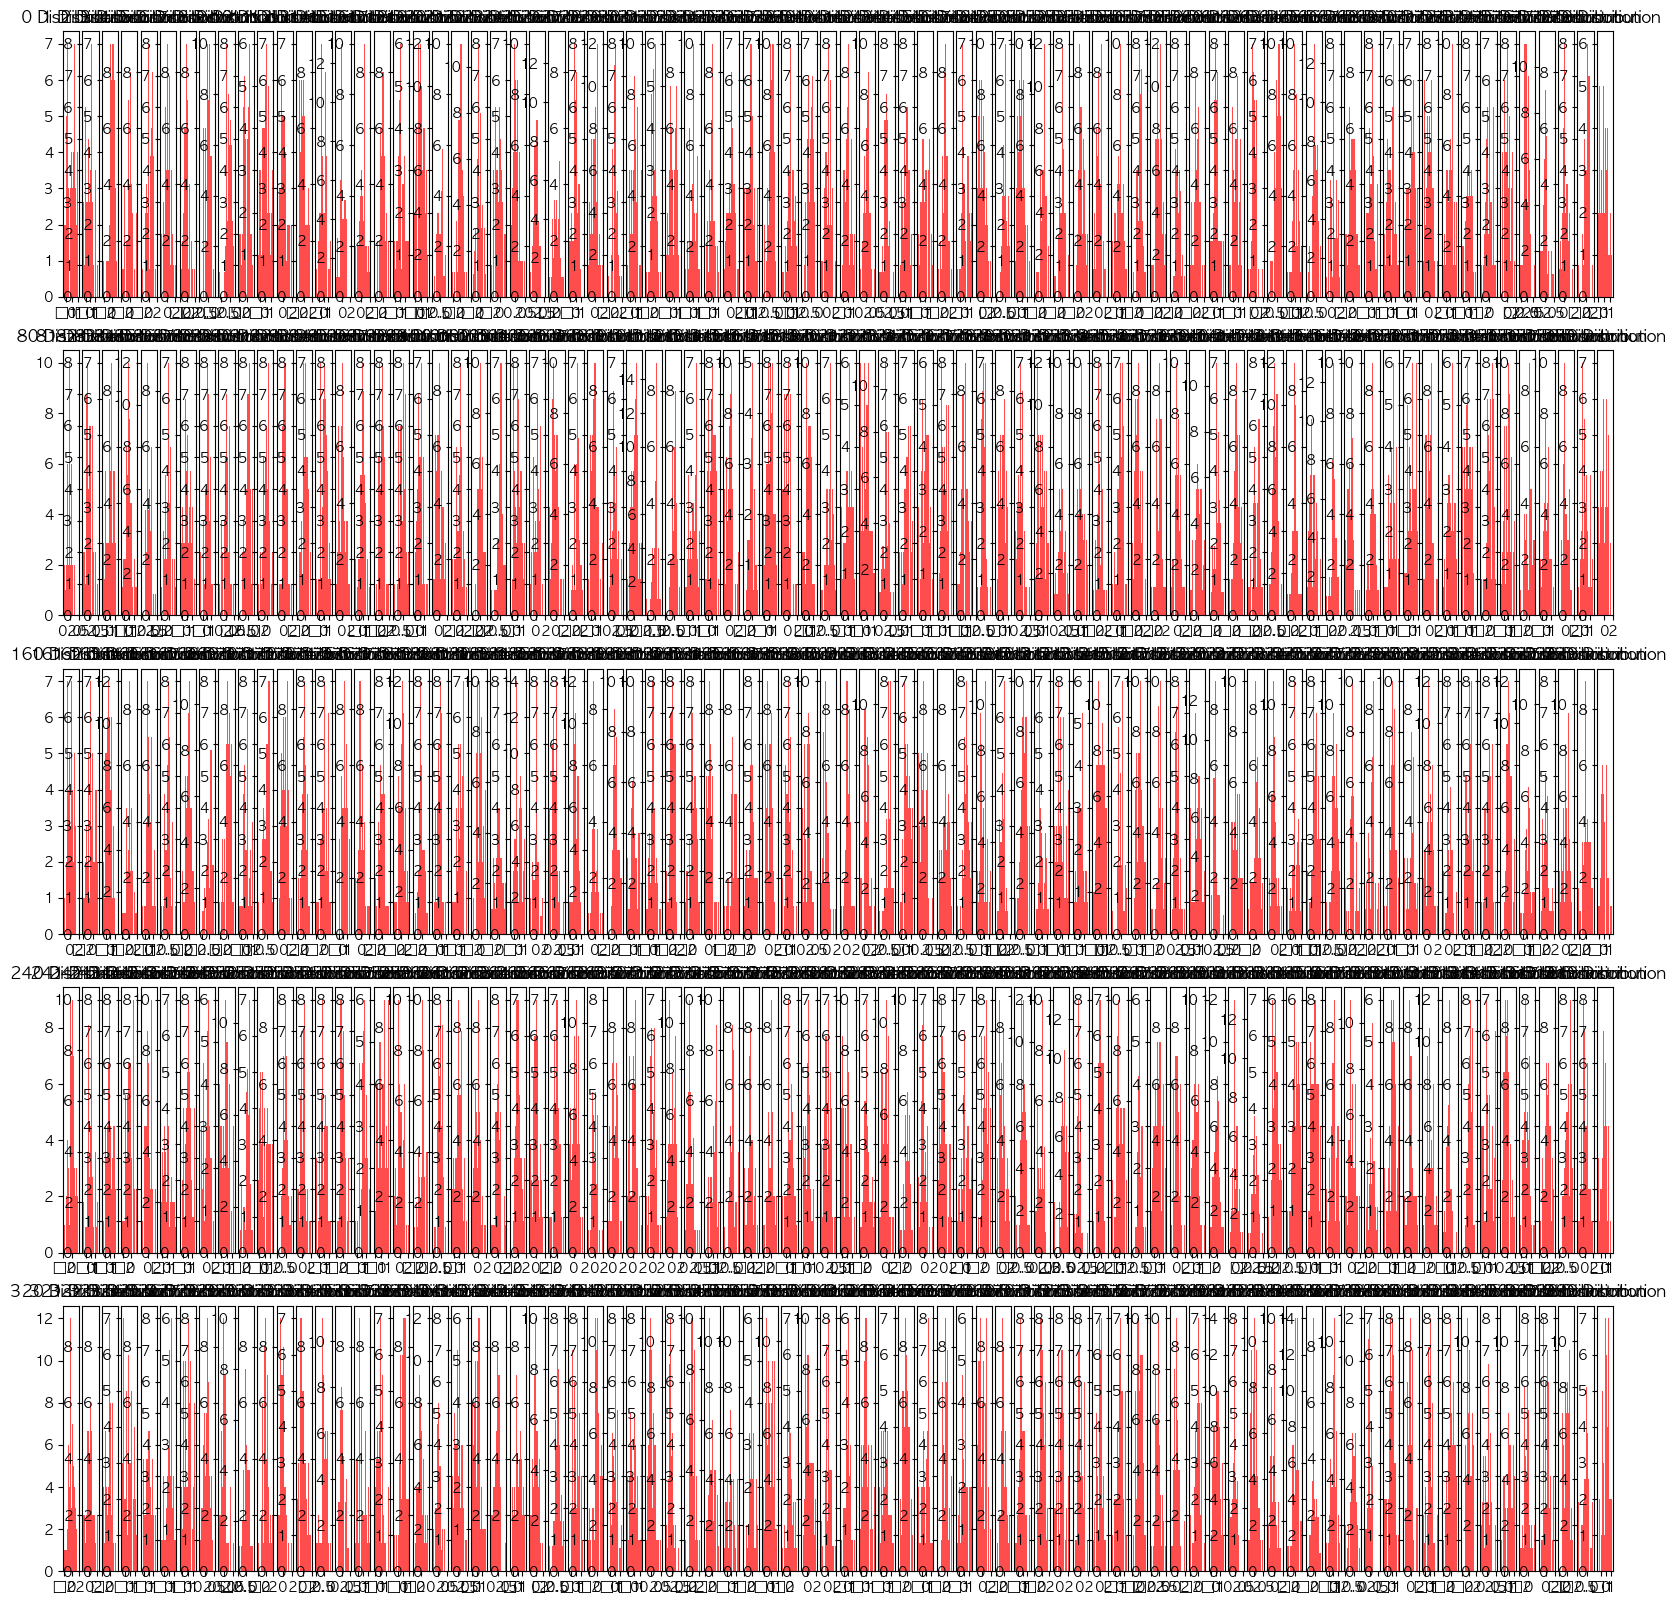

In [83]:
from scipy.stats import norm

feature_columns = new_df.drop(columns='y').columns
rows = 5
cols = len(feature_columns) // 5 + (1 if len(feature_columns) % 5 else 0)  

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
axes = axes.flatten() 

for i, col in enumerate(feature_columns):
    if i < len(axes):  
        col_outliers = new_df[col].loc[new_df['y'] == 1].values
        axes[i].hist(col_outliers, bins=20, color='r', alpha=0.7)
        axes[i].set_title(f'{col} Distribution')


for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [84]:
# # Feature 중 Outlier 제거

# total_outlier = 0

# for col in new_df.columns[:-1]:  
#     if new_df[col].dtype == 'float64' or new_df[col].dtype == 'int64':  
#         outlier_values = new_df[col].loc[new_df['y'] == 1].values
#         q25, q75 = np.percentile(outlier_values, 25), np.percentile(outlier_values, 75)
#         iqr = q75 - q25

#         cut_off = iqr * 1.5
#         lower, upper = q25 - cut_off, q75 + cut_off

#         outliers = [x for x in outlier_values if x < lower or x > upper]
#         total_outlier += len(outliers)

#         # Removing outliers
#         new_df = new_df.drop(new_df[(new_df[col] > upper) | (new_df[col] < lower)].index)

#         print(f'----> {col} Removing Outliers')
#         print(f'Quartile 25: {q25} | Quartile 75: {q75}')
#         print(f'iqr: {iqr}')
#         print(f'Cut Off: {cut_off}')
#         print(f'{col} Lower: {lower}')
#         print(f'{col} Upper: {upper}')
#         print(f'Feature {col} Outliers for Outlier Cases: {len(outliers)}')
#         print(f'Col {col} outliers:{outliers}')
#         print('----' * 44)


# print(f'total number of outliers removed: {total_outlier}')

## 차원 축소 및 클러스터링(Dimensionality Reduction and Clustering)

### t-SNE:
- 유클리드 거리(Euclidean Distance)
- 조건부 확률(Conditional Probability)
- 정규 및 T-분포 플롯(Normal and T-Distribution Plots)


정리:
- t-SNE 알고리즘은 우리 데이터셋의 사기 및 비사기 사례를 꽤 정확하게 클러스터링할 수 있다
- 비록 서브샘플이 꽤 작지만, t-SNE 알고리즘은 모든 시나리오에서(데이터셋을 t-SNE 실행 전에 셔플) 꽤 정확하게 클러스터를 감지할 수 있다
- 이는 향후 예측 모델이 정상과 이상치를 잘 구분할 수 있을 것임을 알 수 있다.

In [89]:
X = new_df.drop('y', axis=1)
y = new_df['y']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 0.77 s
PCA took 0.014 s
Truncated SVD took 0.27 s


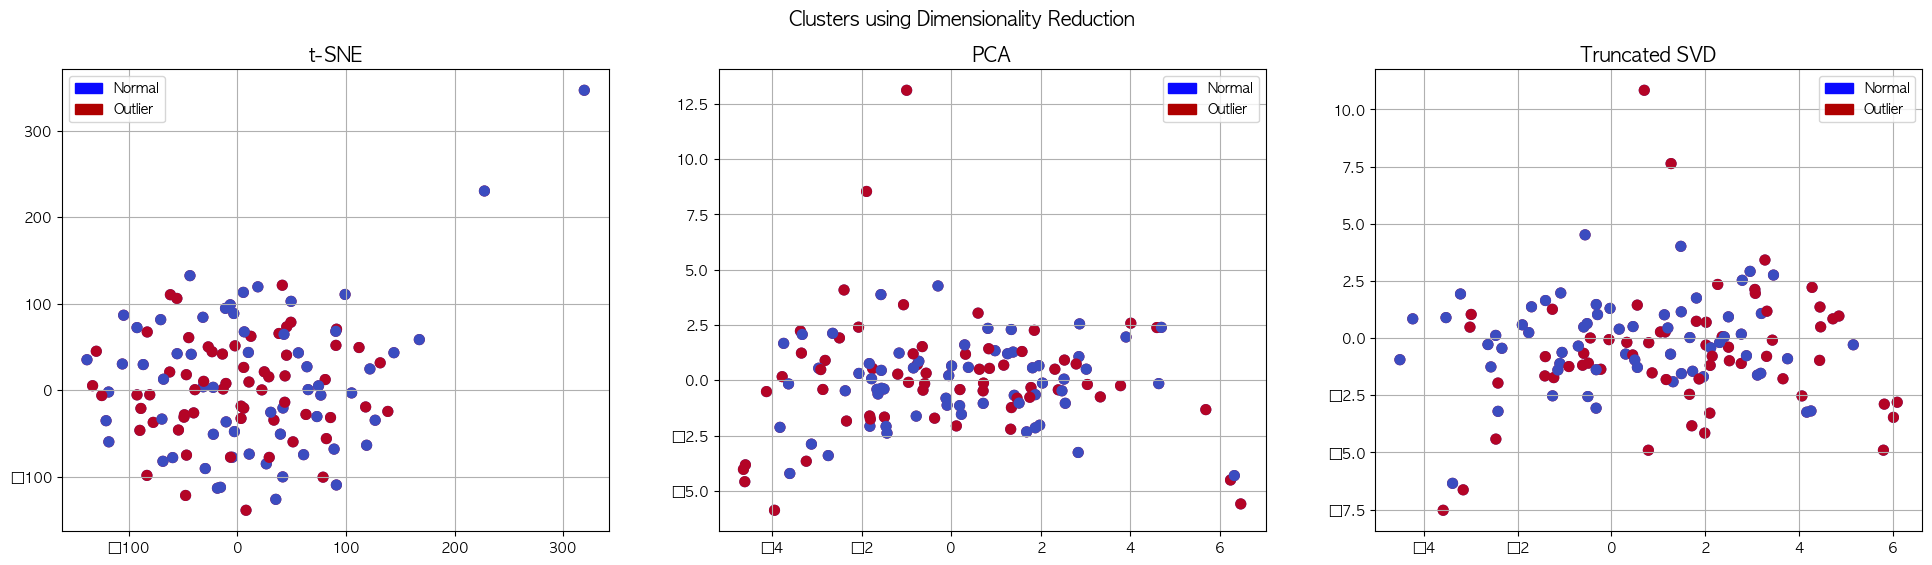

In [93]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Normal')
red_patch = mpatches.Patch(color='#AF0000', label='Outlier')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Outlier', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Outlier', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Normal', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Outlier', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Classifiers(UnderSampling)

4가지 classifiers 비교
- Logistic Regression
- K Nearest Neighbor
- Support Vector Classifier
- Decisin Tree Classifier

이외:
- GridSearchCV: best parameter 찾는 용도

In [145]:
X = new_df.drop('y', axis=1)
y = new_df['y']

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [154]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [155]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [156]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 83.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 57.99999999999999 % accuracy score
Classifiers:  SVC Has a training score of 79.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 63.0 % accuracy score


In [157]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [158]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  82.53%
Knears Neighbors Cross Validation Score 70.0%
Support Vector Classifier Cross Validation Score 83.53%
DecisionTree Classifier Cross Validation Score 63.0%


In [160]:
# We will undersample during cross validating
undersample_X = df.drop('y', axis=1)
undersample_y = df['y']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    # print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    

train_unique_label, train_counts_label = np.unique(undersample_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(undersample_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))


----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.9833842 0.0166158]
[0.98371777 0.01628223]


In [161]:

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

NearMiss Label Distribution: Counter({0: 61, 1: 61})


In [162]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniconda/base/envs/risk_prediction/lib/python3.9/site-packages/matplotlib/pyplot.py'>

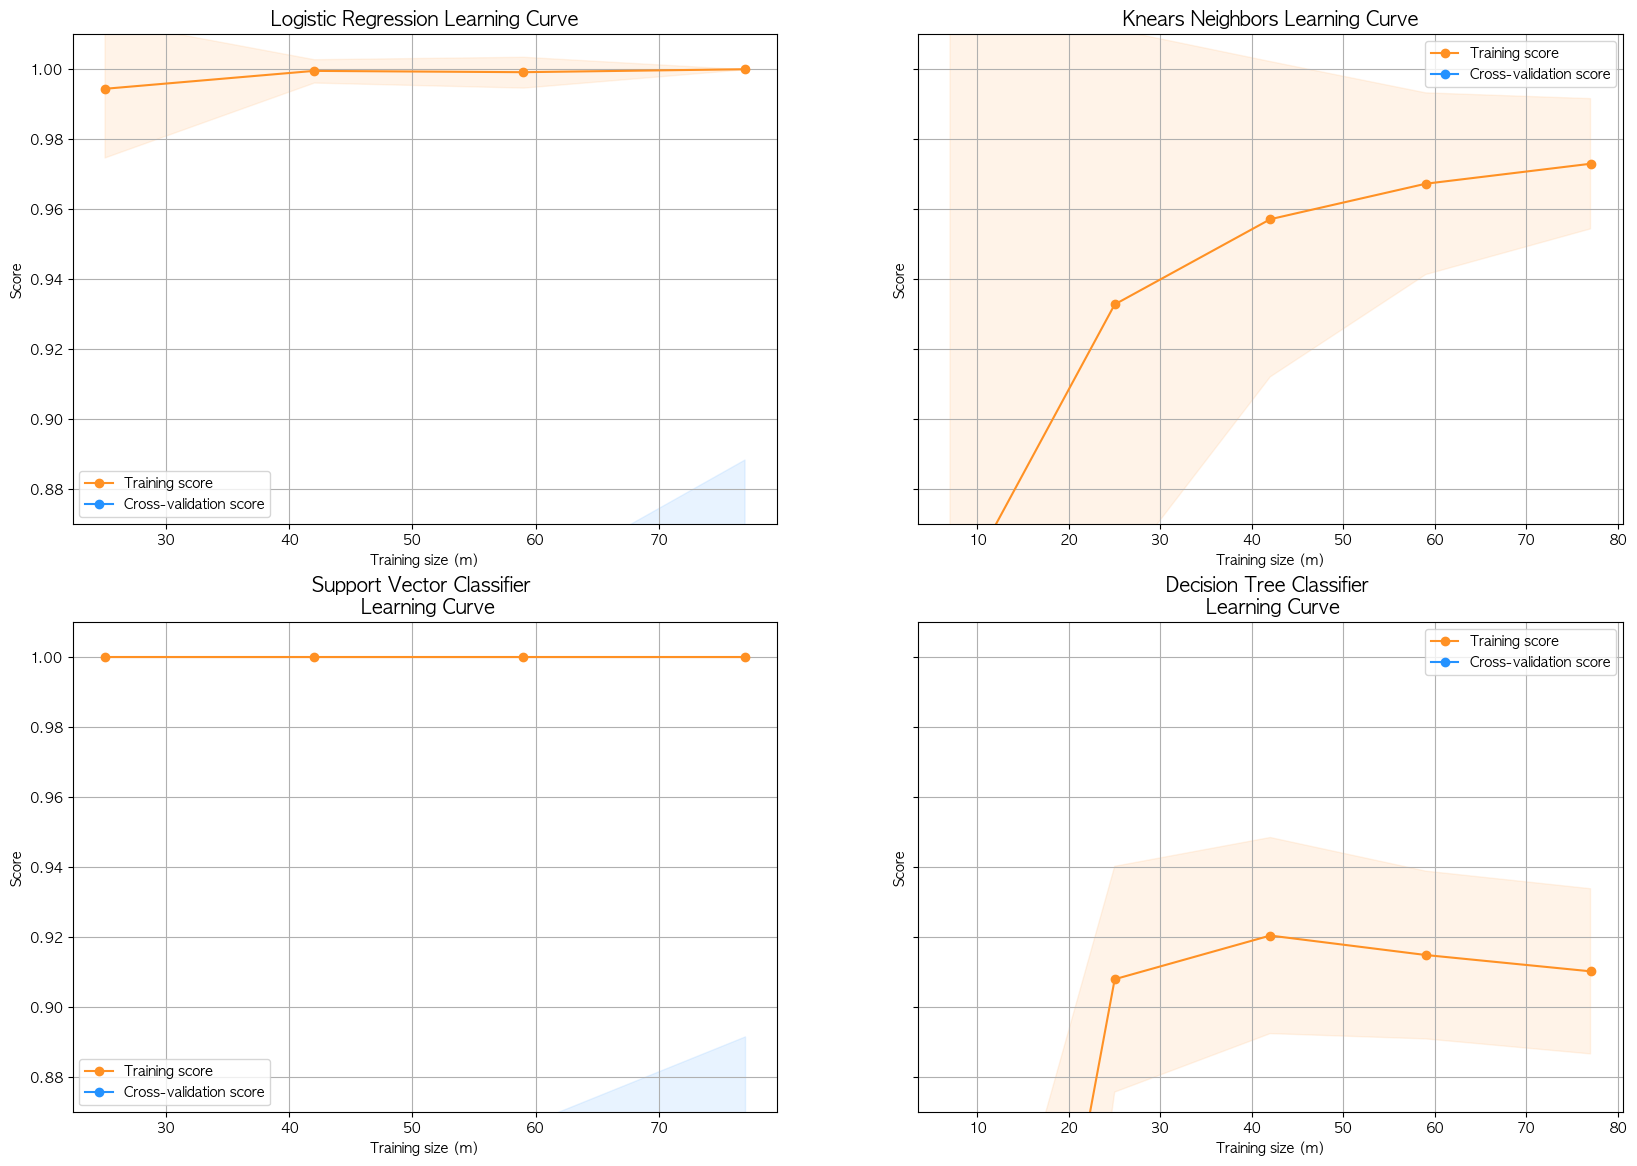

In [163]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [164]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [165]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.8903061224489794
KNears Neighbors:  0.6991921768707482
Support Vector Classifier:  0.8843537414965985
Decision Tree Classifier:  0.6386054421768707


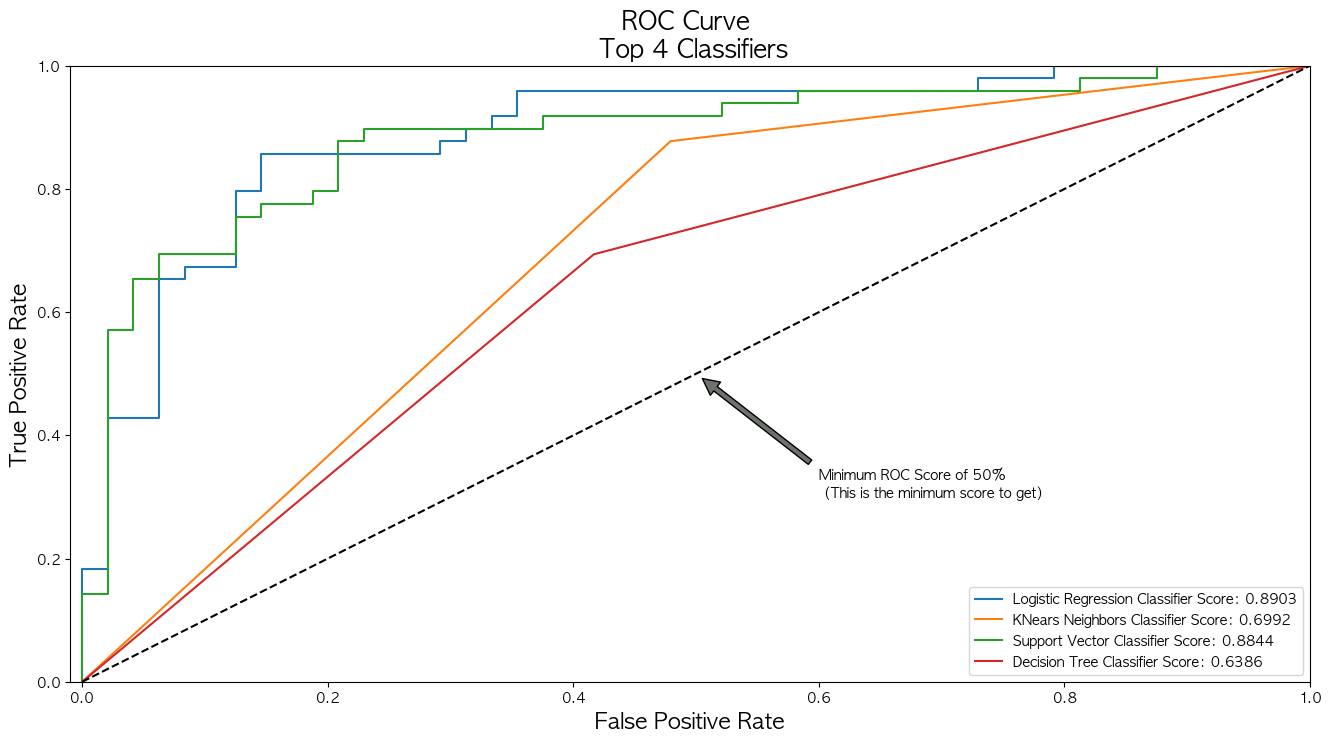

In [166]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

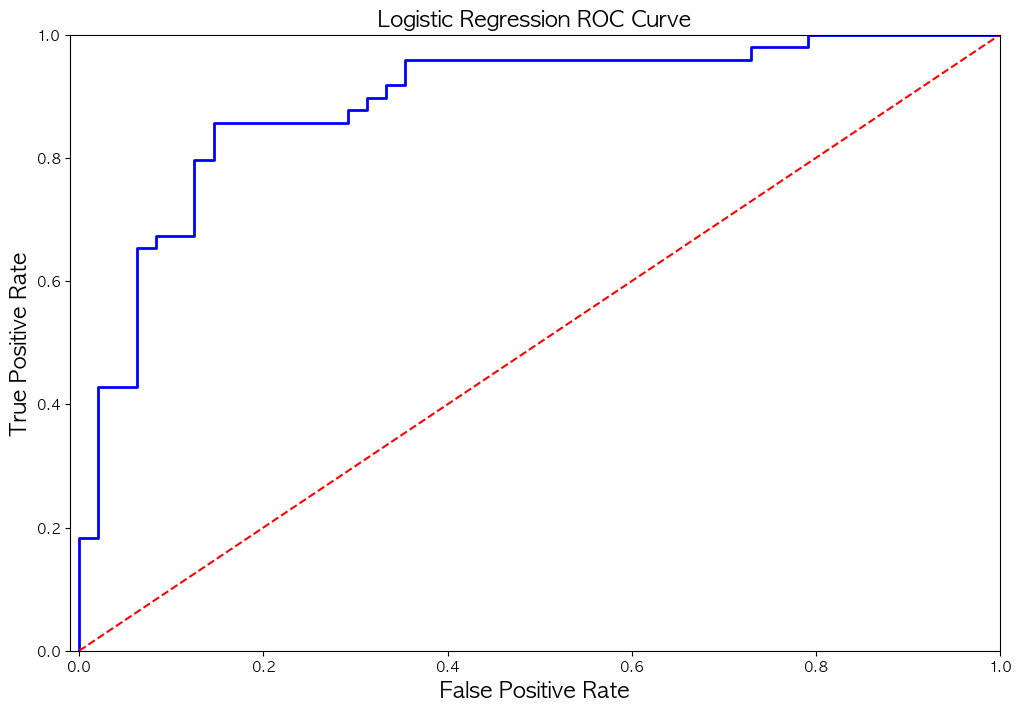

In [167]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [168]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [169]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.96
Precision Score: 0.80
F1 Score: 0.87
Accuracy Score: 0.86
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.74
Precision Score: 0.04
Recall Score: 0.72
F1 Score: 0.08
---------------------------------------------------------------------------------------------------------------------------------------


In [170]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [171]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.10


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.10')

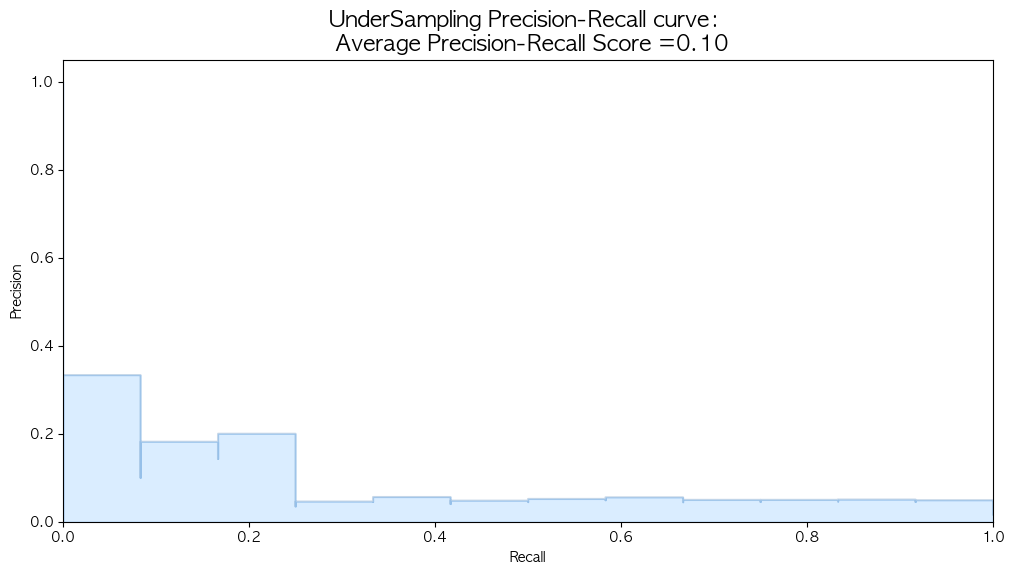

In [172]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

## SMOTE(Synthetic Minority Over-sampling Technique) Technique (Over-Sampling)


![SMOTE_R_visualization](https://i.imgur.com/f2QIGZh.png)


In [173]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 2949 | Length of y (train): 2949
Length of X (test): 737 | Length of y (test): 737
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.964735403297747
precision: 0.1767142008318479
recall: 0.2666666666666667
f1: 0.20957671957671958
---------------------------------------------------------------------------------------------------------------------------------------


In [174]:
labels = ['Normal', 'Outlier']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98       725
     Outlier       0.19      0.33      0.24        12

    accuracy                           0.97       737
   macro avg       0.59      0.65      0.61       737
weighted avg       0.98      0.97      0.97       737



In [176]:
y_score = best_est.decision_function(original_Xtest)
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.25


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.25')

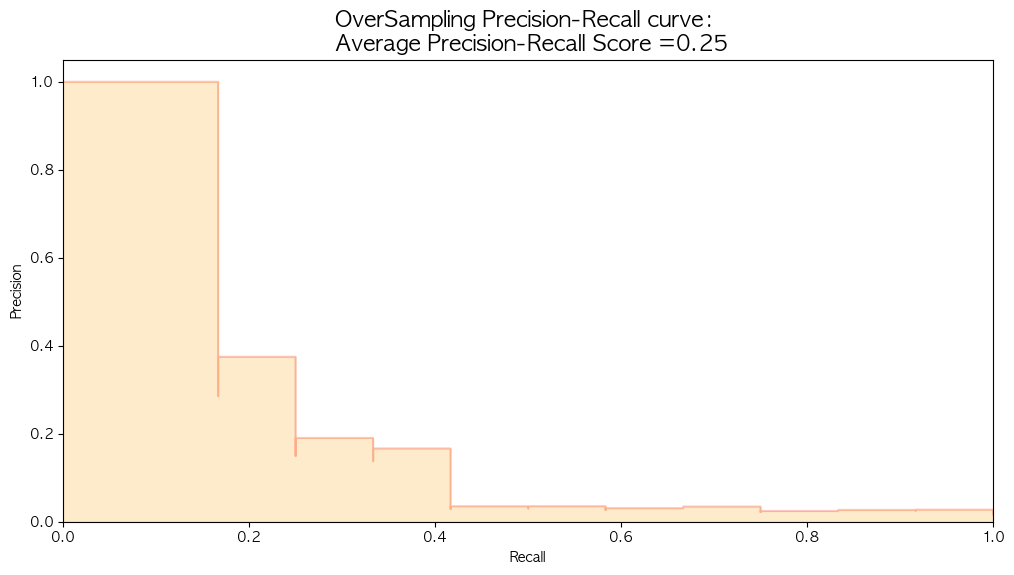

In [177]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [178]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [179]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.1348130702972412 sec


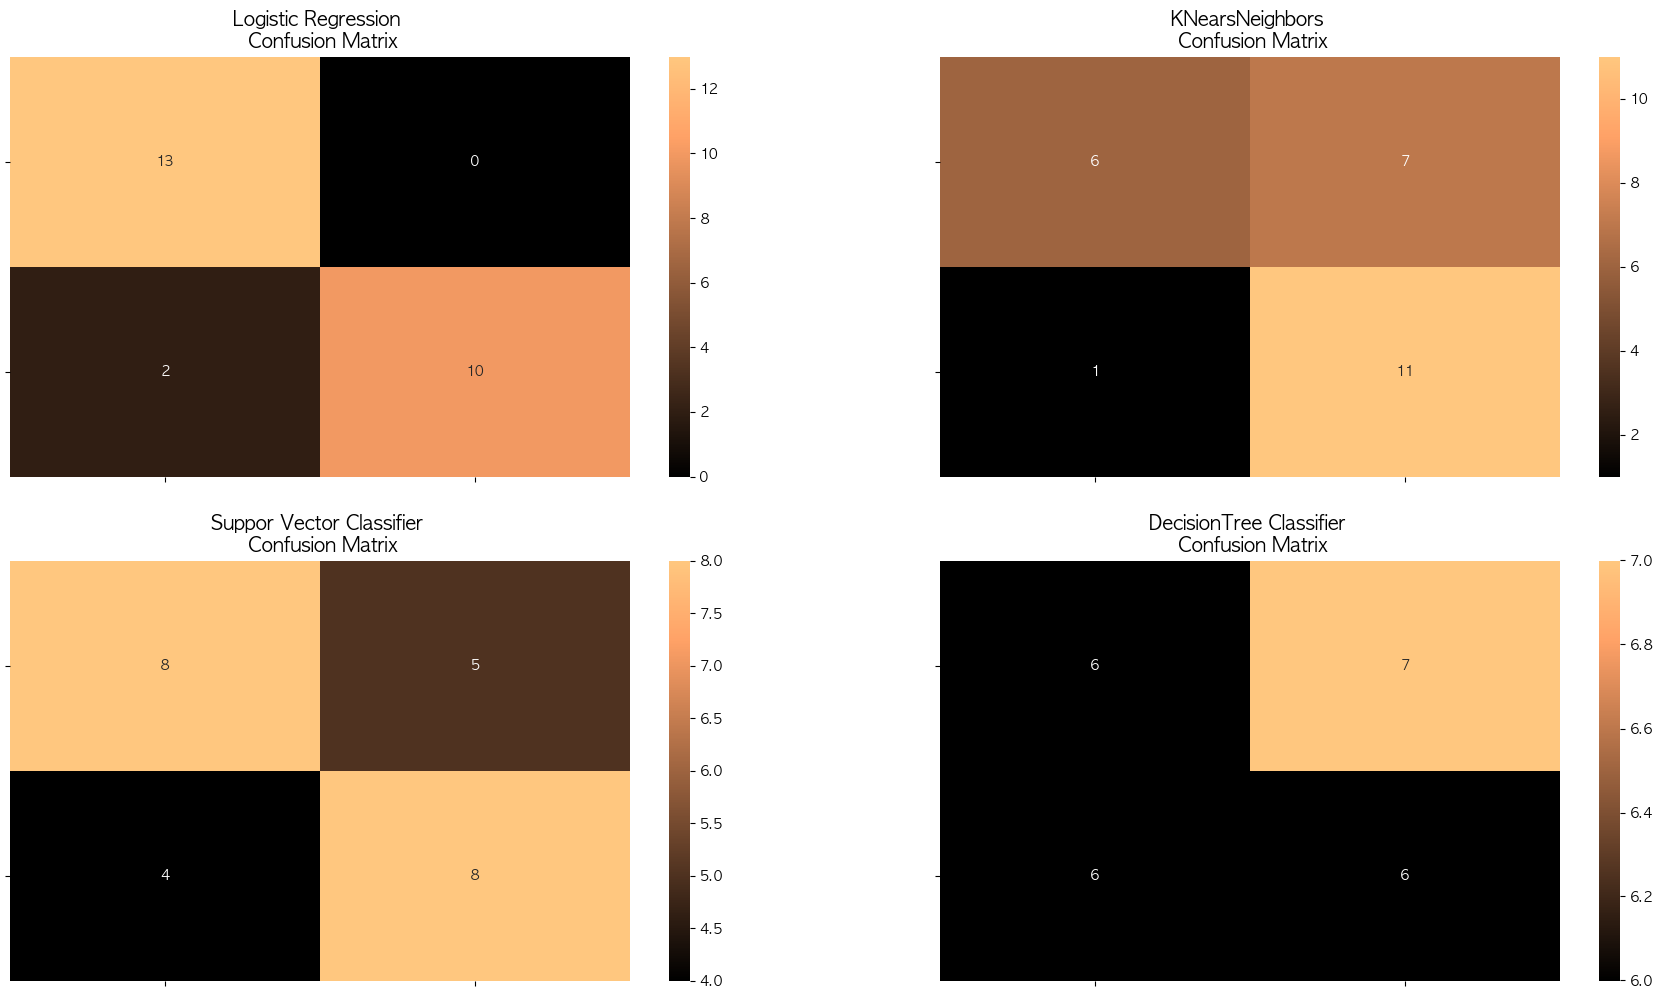

In [180]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [181]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.83      0.91        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.86      0.46      0.60        13
           1       0.61      0.92      0.73        12

    accuracy                           0.68        25
   macro avg       0.73      0.69      0.67        25
weighted avg       0.74      0.68      0.66        25

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.62      0.67      0.64        12

    accuracy                           0.64        25
   macro avg       0.64      0.64      0.64        25
weighted

In [182]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.920000
1,Oversampling (SMOTE),0.966079


## Neural Networks Test On (UnderSampling vs OverSampling)

### Keras Under-Sampling

In [186]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers.legacy import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [187]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dense_4 (Dense)             (None, 32)                12832     
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 173298 (676.95 KB)
Trainable params: 173298 (676.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
undersample_model.compile(Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [189]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20


2024-03-16 20:22:18.825446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


4/4 - 3s - loss: 0.9331 - accuracy: 0.6494 - val_loss: 0.6940 - val_accuracy: 0.7000 - 3s/epoch - 679ms/step
Epoch 2/20
4/4 - 0s - loss: 0.2138 - accuracy: 0.9221 - val_loss: 0.6858 - val_accuracy: 0.7500 - 40ms/epoch - 10ms/step
Epoch 3/20
4/4 - 0s - loss: 0.0820 - accuracy: 0.9740 - val_loss: 0.7358 - val_accuracy: 0.7500 - 41ms/epoch - 10ms/step
Epoch 4/20
4/4 - 0s - loss: 0.0378 - accuracy: 1.0000 - val_loss: 0.7610 - val_accuracy: 0.6500 - 34ms/epoch - 9ms/step
Epoch 5/20
4/4 - 0s - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.7899 - val_accuracy: 0.6500 - 40ms/epoch - 10ms/step
Epoch 6/20
4/4 - 0s - loss: 0.0168 - accuracy: 1.0000 - val_loss: 0.8181 - val_accuracy: 0.6500 - 35ms/epoch - 9ms/step
Epoch 7/20
4/4 - 0s - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.8444 - val_accuracy: 0.6500 - 33ms/epoch - 8ms/step
Epoch 8/20
4/4 - 0s - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.8727 - val_accuracy: 0.6500 - 34ms/epoch - 8ms/step
Epoch 9/20
4/4 - 0s - loss: 0.0073 - accuracy: 1

In [190]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [191]:
undersample_fraud_predictions = np.argmax(undersample_predictions, axis=1)

In [192]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[393 332]
 [  0  12]]
Confusion matrix, without normalization
[[725   0]
 [  0  12]]


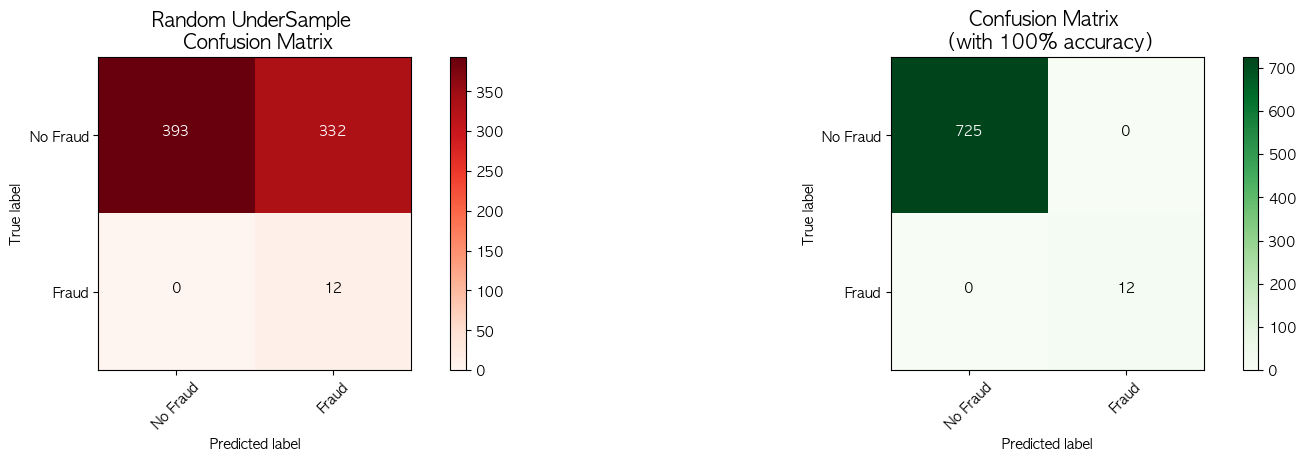

In [193]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Keras OverSampling(SMOTE)

In [194]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [195]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [196]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
16/16 - 1s - loss: 0.6172 - accuracy: 0.7069 - val_loss: 0.0989 - val_accuracy: 0.9940 - 746ms/epoch - 47ms/step
Epoch 2/20
16/16 - 0s - loss: 0.3047 - accuracy: 0.8815 - val_loss: 0.0723 - val_accuracy: 1.0000 - 110ms/epoch - 7ms/step
Epoch 3/20
16/16 - 0s - loss: 0.2199 - accuracy: 0.9267 - val_loss: 0.0755 - val_accuracy: 0.9983 - 113ms/epoch - 7ms/step
Epoch 4/20
16/16 - 0s - loss: 0.1563 - accuracy: 0.9565 - val_loss: 0.0521 - val_accuracy: 1.0000 - 102ms/epoch - 6ms/step
Epoch 5/20
16/16 - 0s - loss: 0.1167 - accuracy: 0.9703 - val_loss: 0.0573 - val_accuracy: 1.0000 - 100ms/epoch - 6ms/step
Epoch 6/20
16/16 - 0s - loss: 0.0910 - accuracy: 0.9767 - val_loss: 0.0347 - val_accuracy: 1.0000 - 106ms/epoch - 7ms/step
Epoch 7/20
16/16 - 0s - loss: 0.0730 - accuracy: 0.9830 - val_loss: 0.0377 - val_accuracy: 1.0000 - 97ms/epoch - 6ms/step
Epoch 8/20
16/16 - 0s - loss: 0.0615 - accuracy: 0.9851 - val_loss: 0.0369 - val_accuracy: 1.0000 - 110ms/epoch - 7ms/step
Epoch 9/20
16/16

In [197]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [198]:
oversample_fraud_predictions = np.argmax(oversample_predictions, axis=1)

Confusion matrix, without normalization
[[702  23]
 [  7   5]]
Confusion matrix, without normalization
[[725   0]
 [  0  12]]


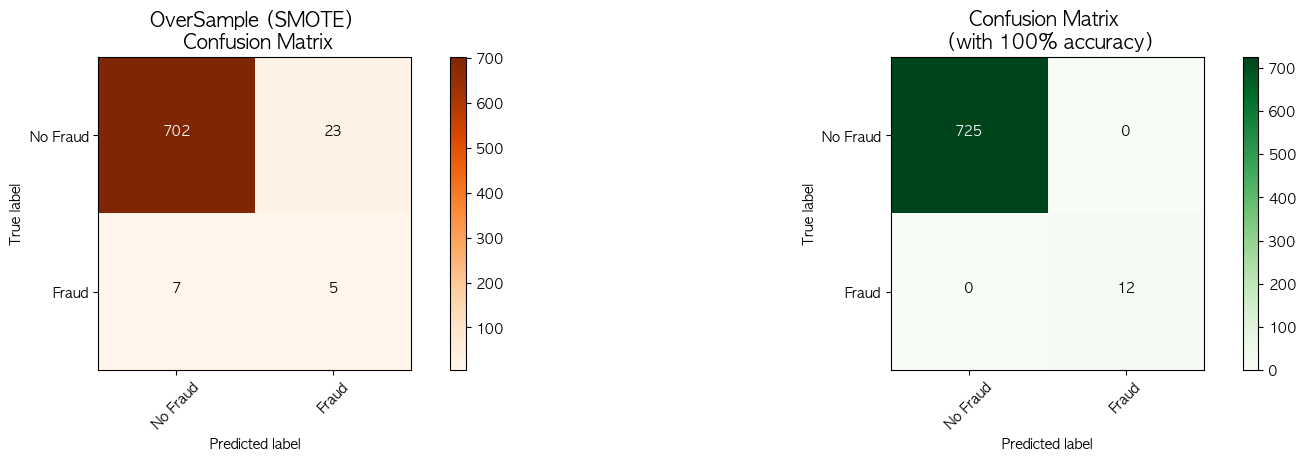

In [199]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)